In [1]:
# import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [2]:
# import data
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.shape

(731, 16)

In [4]:
# data preprocessing
# droping instant and dteday columns
data=data.drop(columns=['dteday','instant'],axis=1)

In [5]:
# checking null value in dataset
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# checking value count and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [7]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# checking correlation of day data
corr = data.corr()
corr['cnt'].sort_values(ascending = False)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

### Visulation

Text(0, 0.5, 'Count of all Biks Rented')

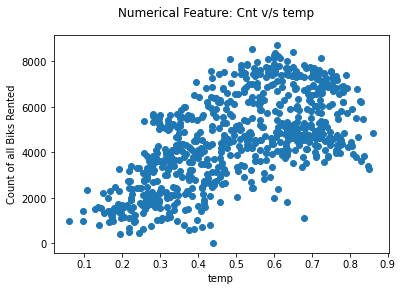

In [9]:
plt.scatter(data['temp'],data['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

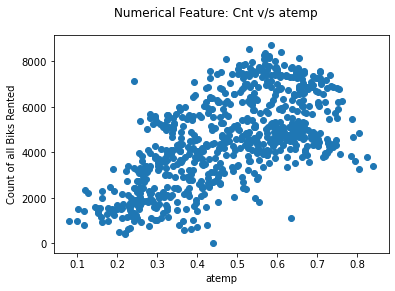

In [10]:
plt.scatter(data['atemp'],data['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')


Text(0, 0.5, 'Count of all Biks Rented')

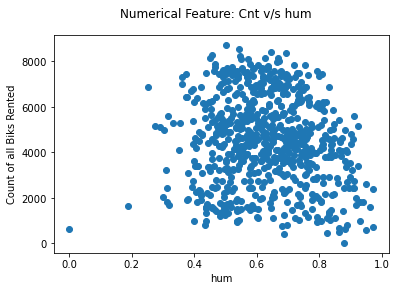

In [11]:
plt.scatter(data['hum'],data['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

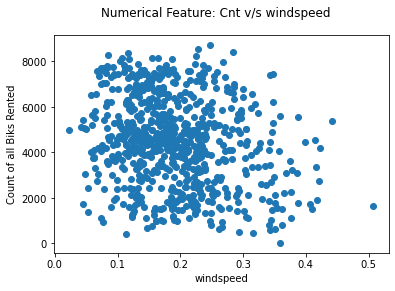

In [12]:
plt.scatter(data['windspeed'],data['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

Text(0.5, 1.0, 'counts of bike rental by season')

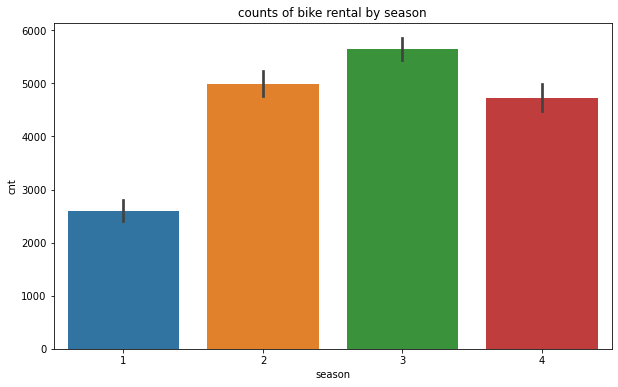

In [13]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'season',y = 'cnt',data=data)
plt.title('counts of bike rental by season')

Text(0.5, 1.0, 'counts of bike rental by weathersit')

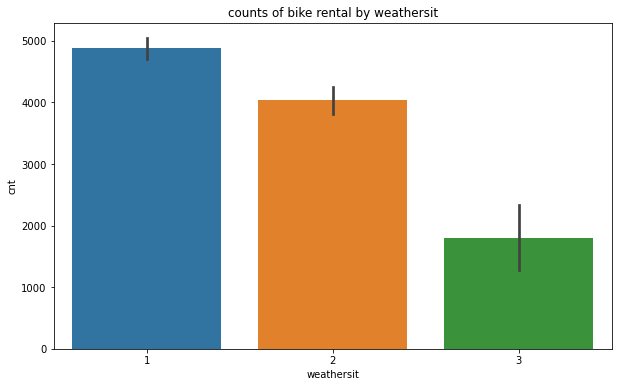

In [14]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'weathersit',y = 'cnt',data=data)
plt.title('counts of bike rental by weathersit')

Text(0.5, 1.0, 'counts of bike rental by yr')

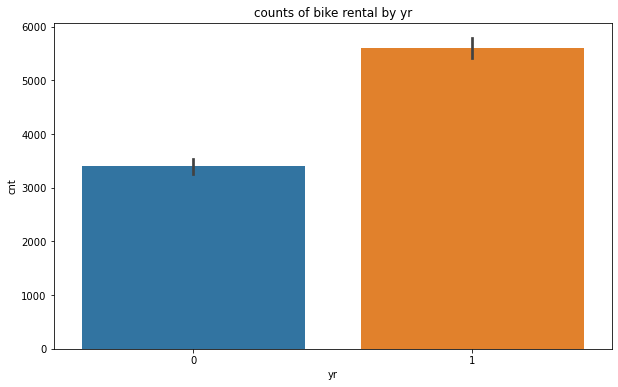

In [15]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'yr',y = 'cnt',data=data)
plt.title('counts of bike rental by yr')

Text(0.5, 1.0, 'counts of bike rental by holiday')

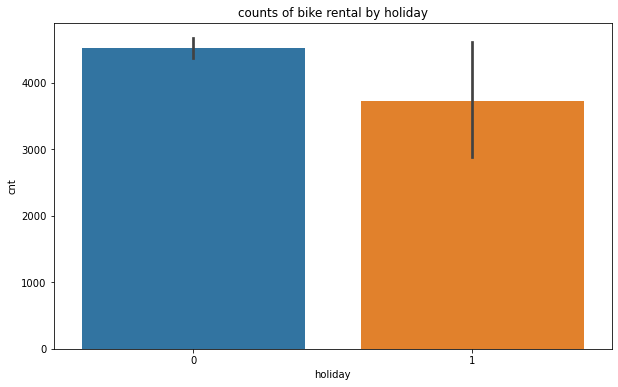

In [16]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'holiday',y = 'cnt',data=data)
plt.title('counts of bike rental by holiday')

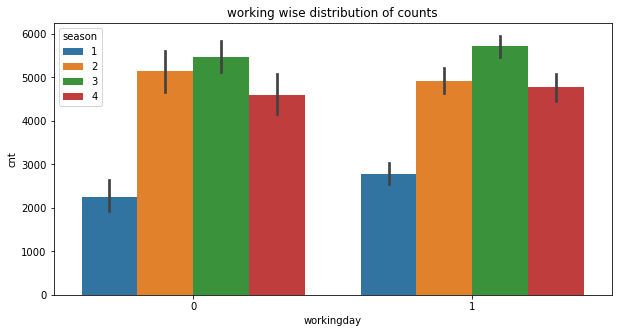

In [17]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=data,x='workingday',y='cnt',hue='season')
ax.set_title('working wise distribution of counts')
plt.show()

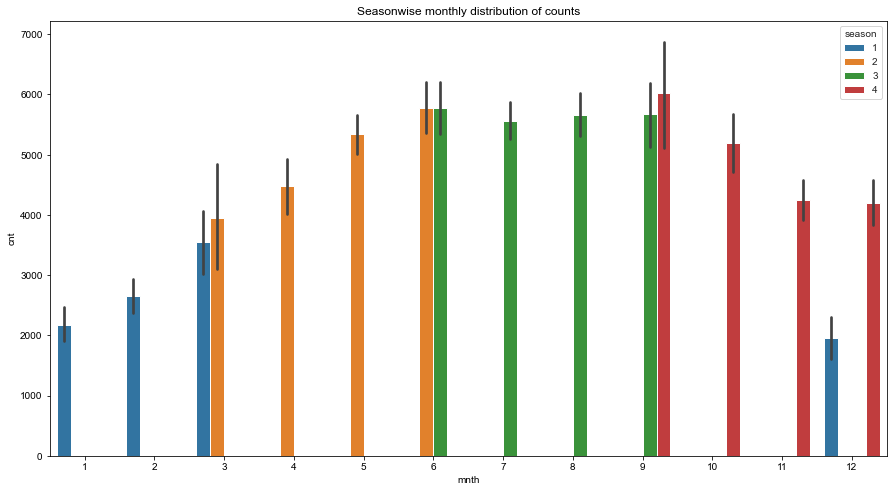

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='mnth',y='cnt',data=data[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

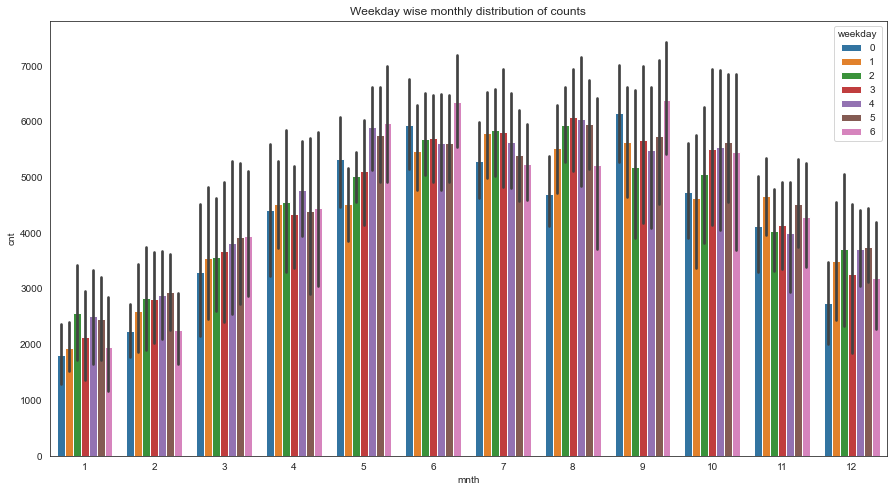

In [19]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='mnth',y='cnt',data=data[['mnth','cnt','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

C:\Users\kushal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


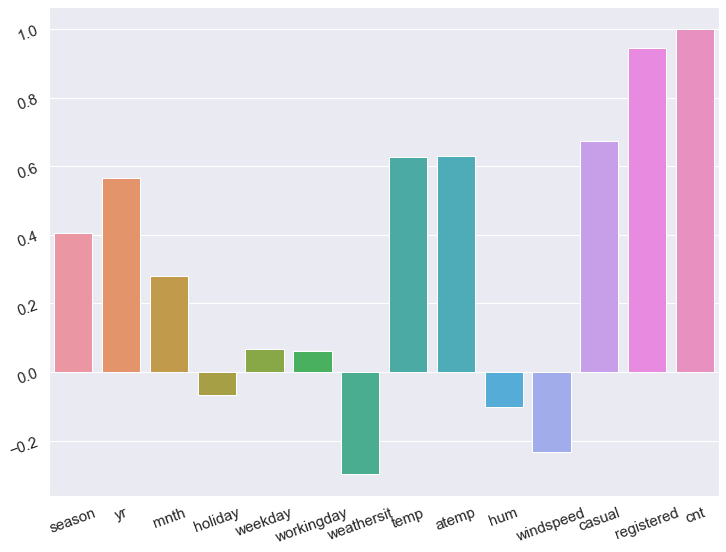

In [20]:

plt.figure(figsize=(12,9))
sns.set()
ax=sns.barplot(data.columns,data.corrwith(data['cnt']))
ax.tick_params(labelsize=15,labelrotation=20)

array([[<AxesSubplot:xlabel='cnt', ylabel='cnt'>,
        <AxesSubplot:xlabel='registered', ylabel='cnt'>,
        <AxesSubplot:xlabel='casual', ylabel='cnt'>,
        <AxesSubplot:xlabel='hum', ylabel='cnt'>],
       [<AxesSubplot:xlabel='cnt', ylabel='registered'>,
        <AxesSubplot:xlabel='registered', ylabel='registered'>,
        <AxesSubplot:xlabel='casual', ylabel='registered'>,
        <AxesSubplot:xlabel='hum', ylabel='registered'>],
       [<AxesSubplot:xlabel='cnt', ylabel='casual'>,
        <AxesSubplot:xlabel='registered', ylabel='casual'>,
        <AxesSubplot:xlabel='casual', ylabel='casual'>,
        <AxesSubplot:xlabel='hum', ylabel='casual'>],
       [<AxesSubplot:xlabel='cnt', ylabel='hum'>,
        <AxesSubplot:xlabel='registered', ylabel='hum'>,
        <AxesSubplot:xlabel='casual', ylabel='hum'>,
        <AxesSubplot:xlabel='hum', ylabel='hum'>]], dtype=object)

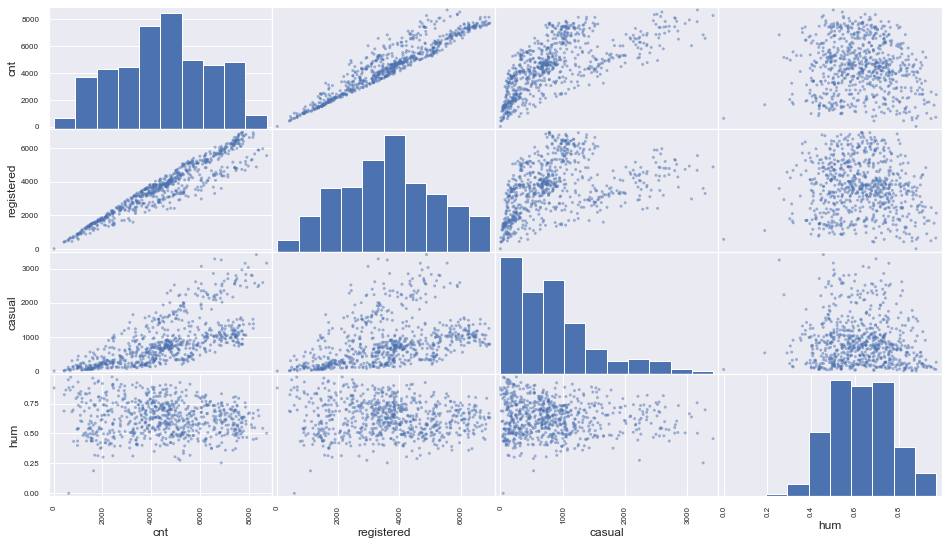

In [21]:
attr = ['cnt','registered','casual','hum']
from pandas.plotting import scatter_matrix
scatter_matrix(data[attr],figsize=(16,9))


# It is found that
### In Season 2, 3 and 4 has the highest count
### In Year 1 has high count than 0
### In Months 3 to 10 has got pretty good count¶
### In weekdays, 0 and 6 has the highest count
### In weather, 1 has the highest count

In [22]:
# numerical and categorial value
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


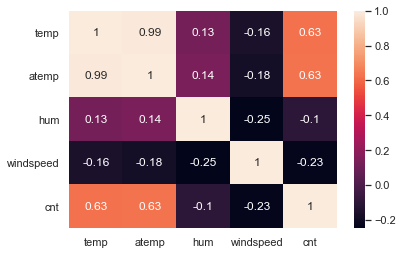

In [23]:
# heatmap
data =data.loc[:, numeric_var]
correlation_result = data.corr()
print(correlation_result)

heatmap = sns.heatmap(correlation_result, annot=True)

In [24]:
# train_test_split
x = data.drop(['cnt'], axis = "columns")
y = data['cnt']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape

(584, 4)

In [27]:
x_test.shape

(147, 4)

In [28]:
# Logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.0

In [29]:
y_test

196    5923
187    4592
14     1248
31     1360
390    4075
       ... 
566    5870
688    5499
266    5423
504    8294
239    4334
Name: cnt, Length: 147, dtype: int64

In [30]:
y_predict

array([6591, 6591, 1685, 1096, 1096, 1096, 1096, 1096, 2425, 1096, 1685,
       1096, 3214, 6591, 6591, 6591, 5312, 1096, 3214, 3214, 5119, 1096,
       1685, 6591, 1096, 6591, 6591, 5119, 5312, 5119, 1685, 6591, 1096,
       5119, 3214, 1685, 6591, 5119, 1685, 1096, 6591, 1685, 6591, 1096,
       6591, 5312, 1685, 6591, 1096, 1685, 6591, 6591, 2425, 6591, 6591,
       1096, 1685, 3068, 6591, 1685, 4401, 1685, 6591, 5119, 5119, 4649,
       6591, 4758, 6591, 1096, 5312, 6591, 1096, 6591, 2425, 1096, 6591,
       5119, 1685, 1685, 5119, 1685, 5119, 2425, 6591, 5119, 5119, 4401,
       6591, 6591, 1685, 2425, 6591, 6591, 6591, 1096, 1096, 6591, 6591,
       1685, 5191, 5312, 1096, 6591, 1685, 5119, 5119, 6591, 1096, 1096,
       6591, 6591, 6591, 5312, 1685, 5119, 6591, 6591, 5191, 3214, 1096,
       6591, 5312, 1096, 6591, 6591, 1096, 6591, 1685, 5312, 1096, 6591,
       1685, 1685, 1685, 6591, 5119, 6591, 5191, 6591, 2425, 5312, 6591,
       1685, 4401, 5119, 6591], dtype=int64)

In [31]:
pd.crosstab(y_test,y_predict)

col_0,1096,1685,2425,3068,3214,4401,4649,4758,5119,5191,5312,6591
cnt,,,,,,,,,,,,
605,1,0,0,0,0,0,0,0,0,0,0,0
623,0,0,1,0,0,0,0,0,0,0,0,0
627,1,0,0,0,0,0,0,0,0,0,0,0
801,0,1,0,0,0,0,0,0,0,0,0,0
822,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7713,0,0,0,0,0,0,0,0,1,0,0,0
7907,0,0,0,0,0,0,0,0,0,0,1,0
8120,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
confusion_matrix(y_test,y_predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
# decision tree model
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.0

In [34]:
pd.crosstab(y_test,y_predict)

col_0,431.0,441.0,683.0,920.0,1000.0,1011.0,1027.0,1204.0,1301.0,1536.0,...,7538.0,7582.0,7592.0,7639.0,7641.0,7736.0,7804.0,8090.0,8167.0,8395.0
cnt,,,,,,,,,,,,,,,,,,,,,
605,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
# random forest classifier model
model1 = RandomForestClassifier(random_state=0,n_estimators=100)
model1.fit(x_train,y_train)
y_predict = model1.predict(x_test)
accuracy_score(y_test,y_predict)

0.0

In [36]:
pd.crosstab(y_test,y_predict)

col_0,506,1115,1301,1317,1321,1421,1501,1510,1536,1623,...,7055,7109,7347,7498,7538,7582,7641,7865,8227,8555
cnt,,,,,,,,,,,,,,,,,,,,,
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# linear regression model
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.3972578881021531

In [38]:
y_test

196    5923
187    4592
14     1248
31     1360
390    4075
       ... 
566    5870
688    5499
266    5423
504    8294
239    4334
Name: cnt, Length: 147, dtype: int64

In [39]:
y_predict

array([5808.43100813, 6228.86684945, 3369.36314536, 2586.18569705,
       3643.92841582, 3547.38919109, 3703.11753292, 4344.2907964 ,
       4947.60858624, 2374.85051016, 2609.67593669, 2951.33533624,
       2566.18887318, 6002.5044209 , 6351.79379706, 5201.6267157 ,
       5199.99910075, 4432.86601062, 2648.68935643, 3206.92365962,
       6558.44188662, 2758.65030347, 3521.1280243 , 5528.81255265,
       1644.6202812 , 5682.48288184, 7439.89170487, 6179.44884628,
       5139.93675495, 5406.39375848, 1809.92856839, 5760.48190598,
       3759.45813489, 6186.47796052, 3122.77342736, 3524.54536561,
       6053.42260416, 7529.59074041, 3979.83171147, 3283.93998721,
       4365.61406613, 3106.9677976 , 5136.5146482 , 3369.64033618,
       6042.46456785, 5343.23330939, 3085.54419587, 5017.97254438,
       2815.67218136, 3341.72945957, 5789.89436853, 6163.72129222,
       4612.07673371, 4951.18071421, 5465.72304157, 3979.28048002,
       2989.19994499, 4495.58608189, 6115.9086871 , 3642.77133

In [40]:
pd.crosstab(y_test,y_predict)

col_0,1176.187993,1644.620281,1807.363502,1809.928568,1898.028405,2374.850510,2500.810741,2515.156320,2534.789859,2566.188873,...,6417.578485,6501.535491,6558.441887,6713.220328,6717.843938,7114.885639,7135.714845,7136.187711,7439.891705,7529.590740
cnt,,,,,,,,,,,,,,,,,,,,,
605,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
822,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Dataframe for models
Model = ['Linear Regression','Decision tree','Random Forest','Logistic Regression']
data=pd.DataFrame(Model,columns=['Model'])
R2_score = [0.846,0.84,0.897]
data=pd.DataFrame(R2_score,columns=['R2_score'])
Model_data=pd.merge(data,data,left_index=True,right_index=True)
print('Model evaluation on test data:\n',Model_data)

Model evaluation on test data:
    R2_score_x  R2_score_y
0       0.846       0.846
1       0.840       0.840
2       0.897       0.897


In [42]:
# k-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [43]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[5 6 7 8] [0 1 2 3 4]
[0 1 2 3 4] [5 6 7 8]


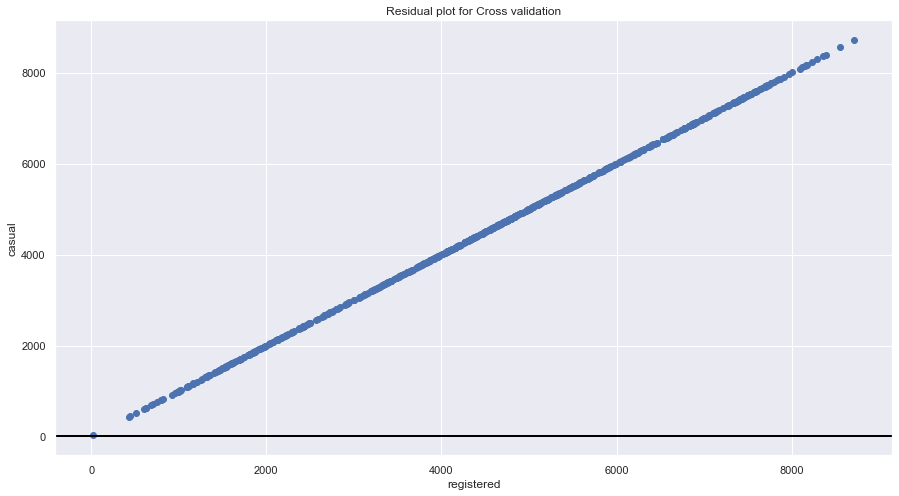

In [44]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y,y)
ax.axhline(lw=2,color='black')
ax.set_title('Residual plot for Cross validation')
ax.set_xlabel('registered')
ax.set_ylabel('casual')
plt.show()